In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minimización $\chi^2$ de una línea recta 

Le mando un ejemplo de cómo hacer una minimización $\chi^2$ en una línea recta, para esto necesitamos un moodelo matematico.

En este caso el modelo matemático es el de una recta $y=mx+b$ donde $m$ y $b$ son la pendiente y la ordenada al origen.

Generaremos datos aleatorios, donde nosotros sabemos la verdad (esto en general no es el caso)

Visualicemos primero los datos.

In [2]:
# Parametros reales
m_true = -2.678
b_true = 4.294

# Generar datos "sinteticos"
N = 50 # Numero de datos
np.random.seed(0) # Para asegurarnos de que cada vez que corramos el notebook obtengamos lo mismo
x=np.linspace(0,10,N) # Coorenadas en X 
yerr = np.random.normal(0,1,size=N) # Errores aleatorios que siguen una distribución normal de media 0 con dispersión 1.
y = m_true*x+b_true
y += yerr
yerr += np.random.normal(0,0.3,size=N) # También agregamos otro tipo error más pequeño; por ejemplo, ruido.
yerr = np.abs(yerr) # Los valores del error siempre son positivos

Text(0, 0.5, 'y')

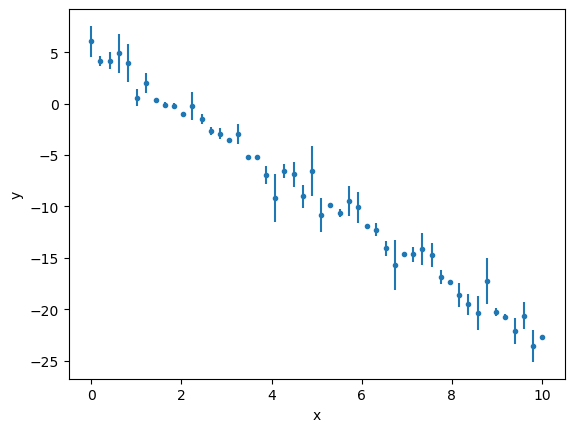

In [3]:
plt.errorbar(x,y,yerr=yerr,fmt='.')
plt.xlabel('x')
plt.ylabel('y')

Ahora definamos nuestro modelo y la función $\chi^2$ que vamos a minimizar.

In [4]:
# Modelo teórico
def model(params, x):
    m, b = params
    return m * x + b

# Función chi2
def chi_square(params, x_obs, y_obs, y_err):
    # El orden de estos argumentos en la función siempre debe tener los parametros a minimizar primero.
    # Pueden tener tantos argumentos quieran, pero loo primero siempre deben ser los parametros a minimizar
    y_model = model(params, x_obs)
    chi_square = np.sum(((y_obs - y_model) / y_err) ** 2)
    return chi_square

Para minimizar podriamos hacer uso de multiples técnicas de métodos númericos. Pero tenemos las herramientas de python a la mano, usemoslas.

Usaremos la función minimize de scipy.optimize

In [5]:
from scipy.optimize import minimize

Tip: si quieren saber qué hace una función en un Notebook, pueden poner un ? después de ella y ver sus especificaciones

In [6]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

Como ven los argumentos son la función a minimizar, el initial guess donde empezaremos a buscar los valores, y los argumentos de la función, además de cosas extra como el método de minimización, etc. que no utilizaremos ahora.

Ahora utilizemos esto para encontrar los parametros de los modelos que mejor ajustan a nuestros datos! 

In [7]:
guess = [-1.0,0.0] # Es buena idea tener una primera 
result = minimize(chi_square, guess, args=(x, y, yerr))

# Extract best-fit parameters
m_fit, b_fit = result.x

print("Best-fit:")
print(f"Pendiente (m): {m_fit}")
print(f"Ordenada al origen (b): {b_fit}")

Best-fit:
Pendiente (m): -2.748975084019331
Ordenada al origen (b): 4.571336946607785


In [8]:
print("Differencia porcentual respecto al valor verdadero")
print(f"Pendiente (m): {abs(1-m_fit/m_true):.3%}")
print(f"Ordenada al origen (b): {abs(1-b_fit/b_true):.3%}")

Differencia porcentual respecto al valor verdadero
Pendiente (m): 2.650%
Ordenada al origen (b): 6.459%


Como ven obtenemos una buena aproximación de los valores reales! 

Recuerden que en general no sabemos el valor real de los datos y usualmente solo tenemos tablas, con coordenadas y errores!

# RETO: Hacer una minimización $\chi^2$ de los datos de supernovas

Con los datos de supernovas que utilizamos en clase encontrar los valores de contenido del Universo que mejor ajustan al Universo

Para esto dejen les comparto un poco de Teoría.

El modelo de la magnitud efectiva de una Supernova tipo IA es función de su redshift es


$ m = M + 5 \log_{10} \left( \frac{D_L}{10 \, \text{pc}} \right) $


Ecuación para la distancia de luminosidad $D_L$:


$ D_L = (1 + z)  \int_0^z \frac{c\ dz'}{H(z')} $

Donde:
- $m$: es la magnitud efectiva de la supernova,
- $M$: es la magnitud absoluta (también conocida como magnitud intrínseca o de pico) de la supernova,
- $D_L$: es la distancia de luminosidad a la supernova,
- $z$: es el corrimiento al rojo de la supernova,
- $c$: es la velocidad de la luz,
- $H(z)$: es el parámetro de Hubble como función del corrimiento al rojo.

El parametro de Hubble es: 
$H(z) = H_0 \sqrt{\Omega_k(1+z)^2+ \Omega_M (1+z)^3 + \Omega_R (1+z)^4 + \Omega_{\Lambda}}$

Donde:
- $H_0$ es la constante de Hubble, que representa la tasa de expansión del universo en el presente.
- $\Omega_k$ es la densidad asociada a la curvatura del Universo.
- $\Omega_M$ es la densidad de materia en el universo en términos de la densidad crítica.
- $\Omega_R$ es la densidad de radiación en el universo en términos de la densidad crítica.
- $\Omega_{\Lambda}$ es la densidad de energía oscura en el universo en términos de la densidad crítica.

Para el ejercicio, asuman un Universo plano $\Omega_k=0$, y que la densidad de radiación es despreciable $\Omega_R\rightarrow 0$, por lo tanto $\Omega_M = 1 - \Omega_\Lambda$.

Como pueden notar además de la energía oscura necesitariamos la magnitud absoluta de las supernovas y el valor de la constante de Hubble. Como primer ejercicioo asuman $M = 11$ (valor aproximado de las supernovas que elegimos) y $H_0=70$, después hagan el ejercicio de dejarlos como valores libres en su model (es decir también encuentren los mejores valores que ajustan a los datos). Como guess de la energía oscura usen 0.5 para evitar errores en la función. Como no tenemos los errores en este caso, usen `yerr=1`, o bien modifiquen la función de chi_square para que no considere los errores.

Tip: Si no quieren programar su propia rutina para calcular la distancia luminosa, busquen la librería astropy, y busquen su modulo FlatLambdaCDM, a esta función pasen el argumento `H0=70, Om0=1-OLambda, Tcmb=2.725` donde el segundoo argumentoo es el contenido de materia OLambda es el valor que queremos minimizar y el último argumento es la temperatura del CMB. 

Después de buscar este modulo, usen la función luminisity_distance. 

Link con ejemplos de Astropy: https://docs.astropy.org/en/stable/cosmology/index.html


Suerte!